In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Telco Customer Churn.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


# Exploring Unique Values of Each Variable(Column) in Dataset

In [10]:
# List of columns to exclude
exclude_columns = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']

# Extract unique values for columns not in the exclude list
unique_values = df.loc[:, ~df.columns.isin(exclude_columns)].apply(lambda col: col.unique())

# Display the unique values for each column
for col, values in unique_values.items():
    print(f"Column '{col}': {values}")

Column 'gender': ['Female' 'Male']
Column 'SeniorCitizen': [0 1]
Column 'Partner': ['Yes' 'No']
Column 'Dependents': ['No' 'Yes']
Column 'PhoneService': ['No' 'Yes']
Column 'MultipleLines': ['No phone service' 'No' 'Yes']
Column 'InternetService': ['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Column 'DeviceProtection': ['No' 'Yes' 'No internet service']
Column 'TechSupport': ['No' 'Yes' 'No internet service']
Column 'StreamingTV': ['No' 'Yes' 'No internet service']
Column 'StreamingMovies': ['No' 'Yes' 'No internet service']
Column 'Contract': ['Month-to-month' 'One year' 'Two year']
Column 'PaperlessBilling': ['Yes' 'No']
Column 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column 'Churn': ['No' 'Yes']


# Brief Explanation of Each Variable(Column) of Dataset

***customerID:*** Unique identifier for each customer.

***gender:*** Gender of the customer (Male, Female).

***SeniorCitizen:*** Indicates if the customer is a senior citizen (1 for Yes, 0 for No).

***Partner:*** Whether the customer has a partner (Yes, No).

***Dependents:*** Whether the customer has dependents (Yes, No).

***tenure:*** Number of months the customer has stayed with the company.

***PhoneService:*** Indicates if the customer has a phone service (Yes, No).

***MultipleLines:*** Whether the customer has multiple lines (Yes, No, No phone service).

***InternetService:*** Type of internet service the customer has (DSL, Fiber optic, No).

***OnlineSecurity:*** Indicates if the customer has online security (Yes, No, No internet service).

***OnlineBackup:*** Indicates if the customer has online backup (Yes, No, No internet service).

***DeviceProtection:*** Indicates if the customer has device protection (Yes, No, No internet service).

***TechSupport:*** Indicates if the customer has tech support (Yes, No, No internet service).

***StreamingTV:*** Whether the customer has streaming TV (Yes, No, No internet service).

***StreamingMovies:*** Whether the customer has streaming movies (Yes, No, No internet service).

***Contract:*** Type of contract the customer has (Month-to-month, One year, Two year).

***PaperlessBilling:*** Whether the customer uses paperless billing (Yes, No).

***PaymentMethod:*** Payment method used by the customer (Electronic check, Mailed check, Bank transfer, Credit card).

***MonthlyCharges:*** The amount charged to the customer monthly.

***TotalCharges:*** The total amount charged to the customer.

***numAdminTickets:*** Number of administrative tickets filed by the customer.

***numTechTickets:*** Number of technical tickets filed by the customer.

***Churn:*** Whether the customer churned (Yes, No).

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***here there are some findings in data that TotalCharges Variable is in Object datatype & also SeniorCitizen Variable in Int datatype.***
     - Let's make these Change

In [42]:
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

***Converted 0 and 1 values to yes/no in SeniorCitizen Column for better Understanding.***

In [23]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

***Replaced blanks with 0 as tenure is 0 and no total charges are recorded. and also converted TotalCharges variable(column) datatype from Object to float.***

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

***No null values in dataset***

In [35]:
df.duplicated().sum()

0

***there are No duplicate values in dataset***

In [40]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.515689,0.419566
std,24.559481,30.090047,2266.794470,1.275299,1.250117
min,0.000000,18.250000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,0.000000,0.000000
max,72.000000,118.750000,8684.800000,5.000000,9.000000


***Here we can see some Information on numerical Variables(Columns)***

    1. highest total amount charged to the customer is 8684.80.
    2. highest amount charged to the customer monthly is 118.750.
    3. Maximum 72 months customers has stayed with the company.
    4. the Average total amount charged to the customer is 2279.73
    5. the Avearage amount charged to the customer monthly is 64.76

***Displaying count of Customers Who Have Churned Out***

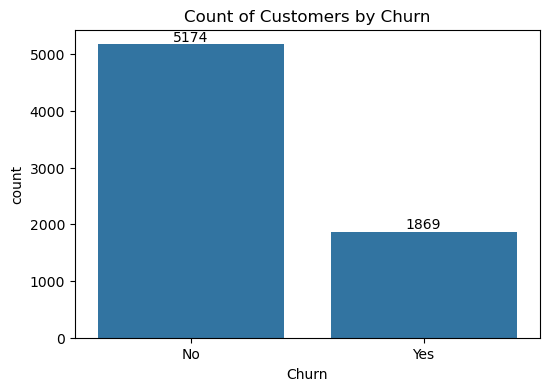

In [13]:
plt.figure(figsize  = (6,4))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

we conclude from the Above plot that 1869 customers have churned out.

***Detecting Percentage of the Churned Out Customers***

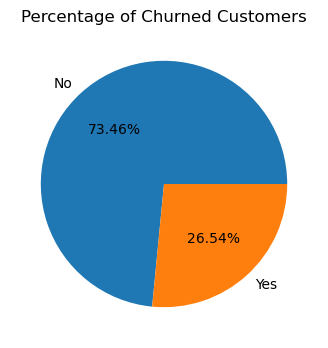

In [16]:
plt.figure(figsize = (6,4))
gb = df.groupby('Churn').agg({'Churn': 'count'})
plt.pie(gb['Churn'],labels = gb.index, autopct = '%1.2f%%')
plt.title('Percentage of Churned Customers')
plt.show()

We can Conclude from the above pie chart that 26.54% of customers have churned out.

# Let's Explore Reason Behind it

***Uncovering Count of Male & Female Customers Seperately***

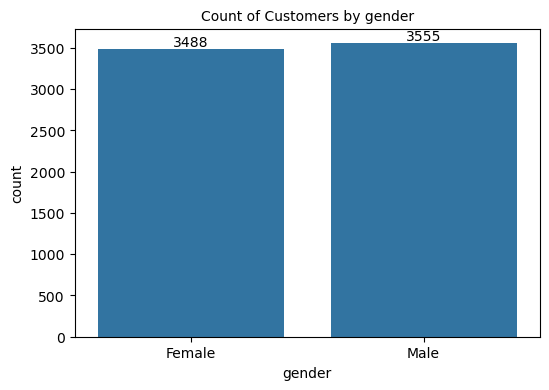

In [19]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'gender', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by gender', fontsize = 10)
plt.show() 

***Identifying Percentage of Male & Female Customers***

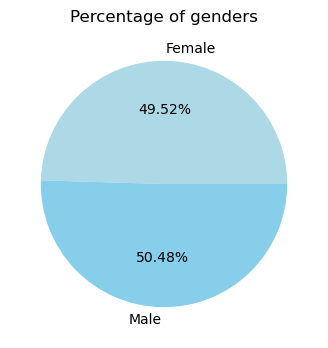

In [22]:
plt.figure(figsize = (6,4))
gb = df.groupby('gender').agg({'gender': 'count'})
plt.pie(gb['gender'],labels = gb.index, colors = ('lightblue','skyblue'),autopct = '%1.2f%%')
plt.title('Percentage of genders')
plt.show()

***Finding the Percentage of Churned Out by gender***

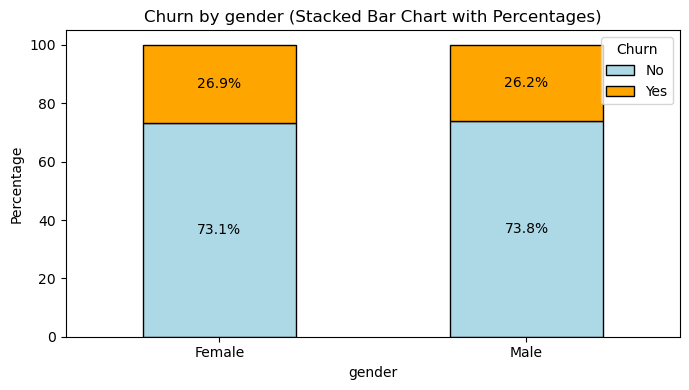

Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


In [21]:
# Calculate counts and percentages
data = df.groupby(['gender', 'Churn']).size().reset_index(name='count')
total_counts = data.groupby('gender')['count'].transform('sum')
data['percentage'] = (data['count'] / total_counts * 100).round(2)

# Pivot the data for stacked bar chart
pivot_data = data.pivot(index='gender', columns='Churn', values='percentage').fillna(0)

# Stacked bar chart
fig, ax = plt.subplots(figsize=(7, 4))
bars = pivot_data.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'orange'], edgecolor='black')

# Add percentage labels on the bars
for idx, bar in enumerate(ax.containers):
    # `bar` contains all bars for a given category
    for rect in bar:
        height = rect.get_height()
        if height > 0:  # Only label non-zero bars
            ax.text(
                rect.get_x() + rect.get_width() / 2,  # Center of the bar
                rect.get_y() + height / 2,  # Center height of the bar
                f"{height:.1f}%",  # Format as percentage
                ha='center', va='center', fontsize=10
            )

# Customize the plot
ax.set_title('Churn by gender (Stacked Bar Chart with Percentages)')
ax.set_ylabel('Percentage')
ax.set_xlabel('gender')
ax.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

churn_percentage = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_percentage)

there are 26.9% Female & 26.2% Male Customers have Churned Out.

***Finding the Count that How many Customers Churned Out by Gender***

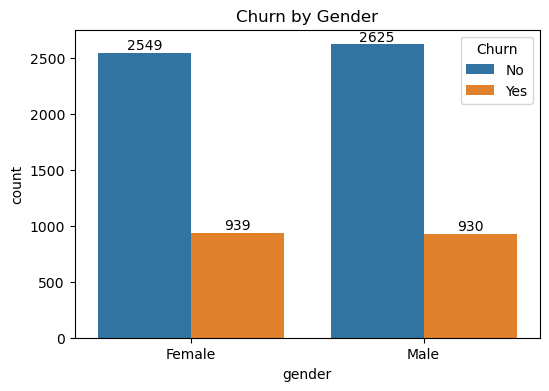

In [24]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='gender', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
# Add count labels only to 'Yes' bars
for container, label in zip(ax.containers, ['No', 'Yes']):
    if label == 'Yes':  # Focus on 'Yes' churned customers
        ax.bar_label(container)
plt.title('Churn by Gender')
plt.show()

we get to know from the above plot, that 939 Female customers has Churned Out, out of 3488 . and 930 Male customers have churned out, out of 3555.

***Revealing the count of SeniorCitizens & Non-SeniorCitizens***

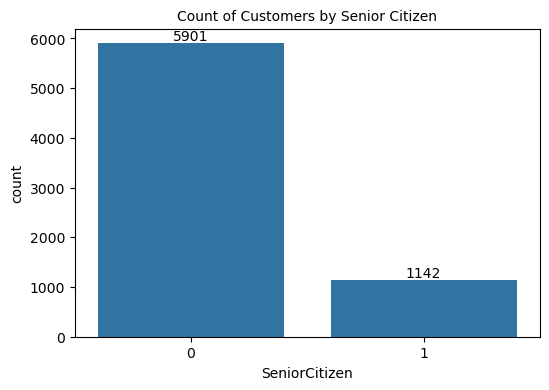

In [28]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Senior Citizen', fontsize = 10)
plt.show() 

there are 1142 senior citizens that we can see from the above plot.

***Spotting the Percentages of SeniorCitizens & non-SeniorCitizens***

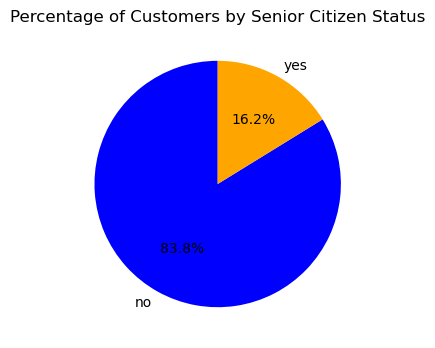

In [50]:
# Calculate the percentage of customers by SeniorCitizen status
senior_citizen_counts = df['SeniorCitizen'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(6, 4))
senior_citizen_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Percentage of Customers by Senior Citizen Status')
plt.ylabel('')  # Hide the y-axis label
plt.show()

***Identifying the churn rate for senior citizens***

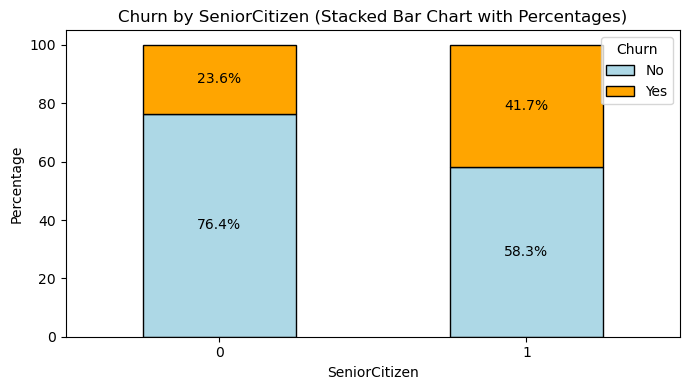

In [33]:
# Calculate counts and percentages
data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')
total_counts = data.groupby('SeniorCitizen')['count'].transform('sum')
data['percentage'] = (data['count'] / total_counts * 100).round(2)

# Pivot the data for stacked bar chart
pivot_data = data.pivot(index='SeniorCitizen', columns='Churn', values='percentage').fillna(0)

# Stacked bar chart
fig, ax = plt.subplots(figsize=(7, 4))
bars = pivot_data.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'orange'], edgecolor='black')

# Add percentage labels on the bars
for idx, bar in enumerate(ax.containers):
    # `bar` contains all bars for a given category
    for rect in bar:
        height = rect.get_height()
        if height > 0:  # Only label non-zero bars
            ax.text(
                rect.get_x() + rect.get_width() / 2,  # Center of the bar
                rect.get_y() + height / 2,  # Center height of the bar
                f"{height:.1f}%",  # Format as percentage
                ha='center', va='center', fontsize=10
            )

# Customize the plot
ax.set_title('Churn by SeniorCitizen (Stacked Bar Chart with Percentages)')
ax.set_ylabel('Percentage')
ax.set_xlabel('SeniorCitizen')
ax.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

From the Above Results we can conclude that more percent(41.7%) of people in seniorcitizen category have churned.

***Visualizing the number of customers according to their tenure***

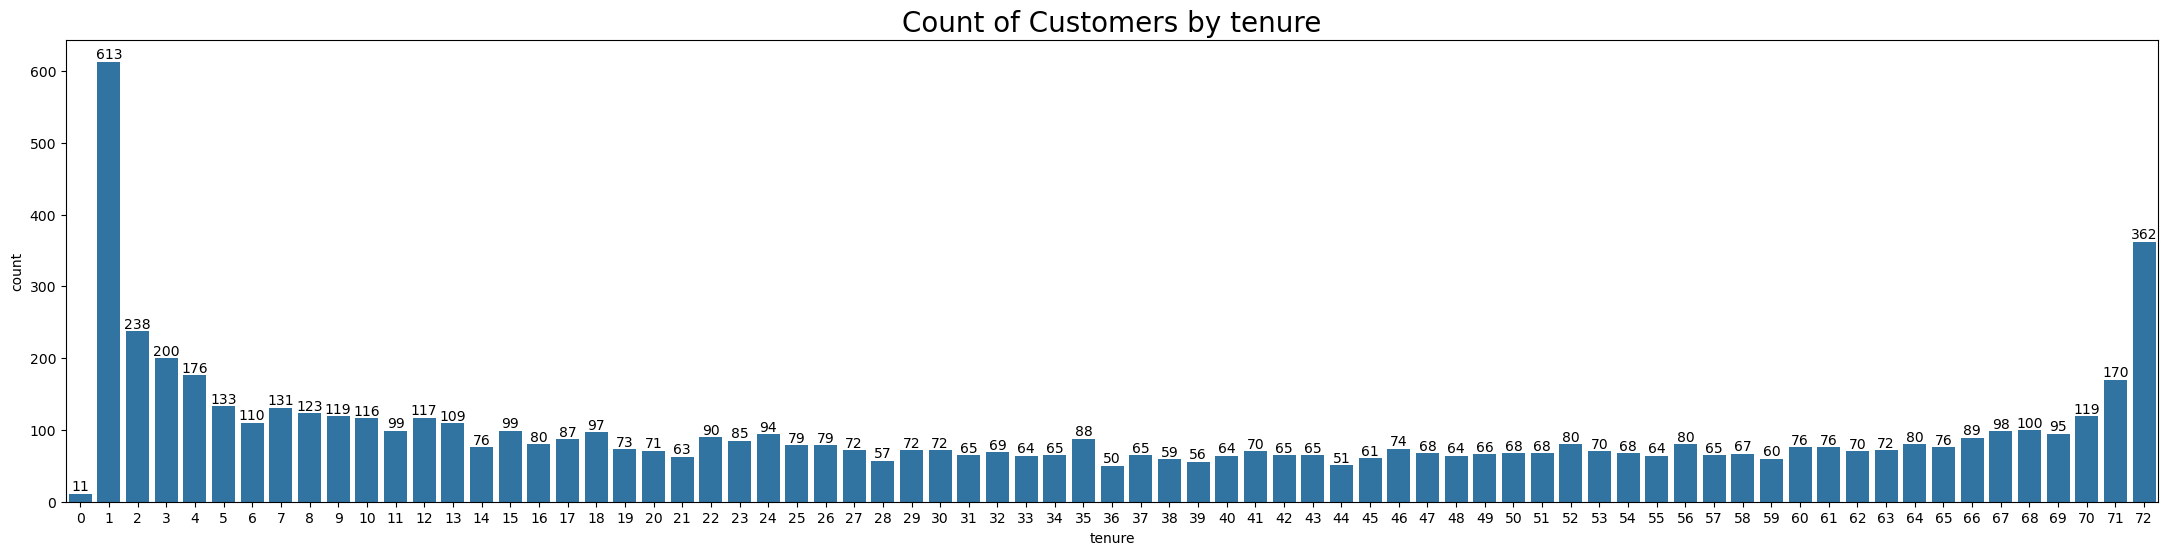

In [60]:
plt.figure(figsize = (27,6))
ax = sns.countplot(x = 'tenure', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by tenure', fontsize = 20)
plt.show() 

***Analyzing churned customers segmented by tenure***

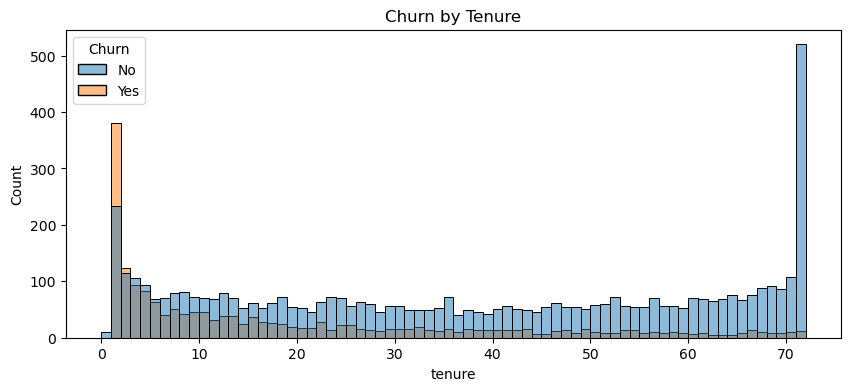

In [38]:
plt.figure(figsize = (10,4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.title('Churn by Tenure')
plt.show()

we can conclude that the people who have used services for 1 or 2 months have churned out.and people who have used services for long time  have stayed.

***Presenting the customer count based on Contract***

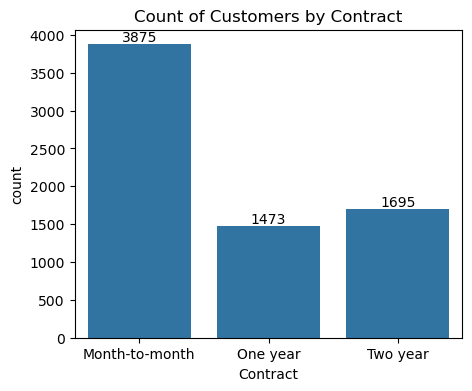

In [73]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'Contract', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contract')
plt.show() 

***Presenting the percentage of customers by contract***

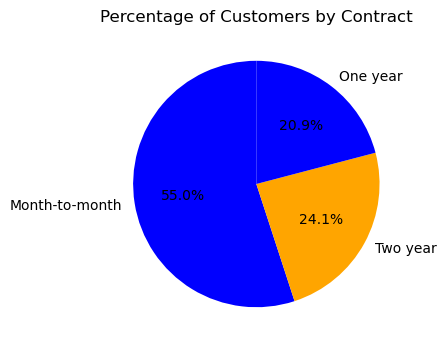

In [70]:
# Calculate the percentage of customers by SeniorCitizen status
Contract_counts = df['Contract'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(6, 4))
Contract_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Percentage of Customers by Contract')
plt.ylabel('')  # Hide the y-axis label
plt.show()

***Finding Customers who have Churned out by Contract***

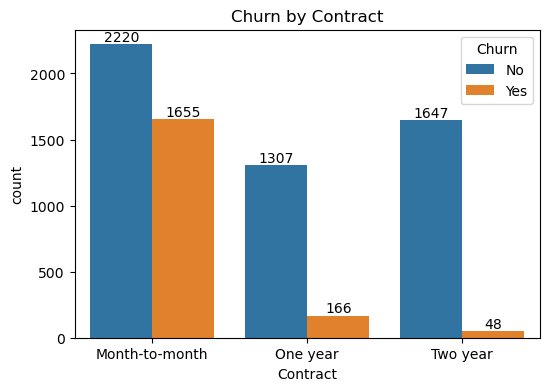

In [44]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
# Add count labels only to 'Yes' bars
for container, label in zip(ax.containers, ['No', 'Yes']):
    if label == 'Yes':  # Focus on 'Yes' churned customers
        ax.bar_label(container)
plt.title('Churn by Contract')
plt.show()

We can conclude from above plot that the people are Churned out mostly, who have taken contract month-to-month Comparitively.

In [83]:
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

***Showing the customer count based on 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', and 'StreamingMovies'.***

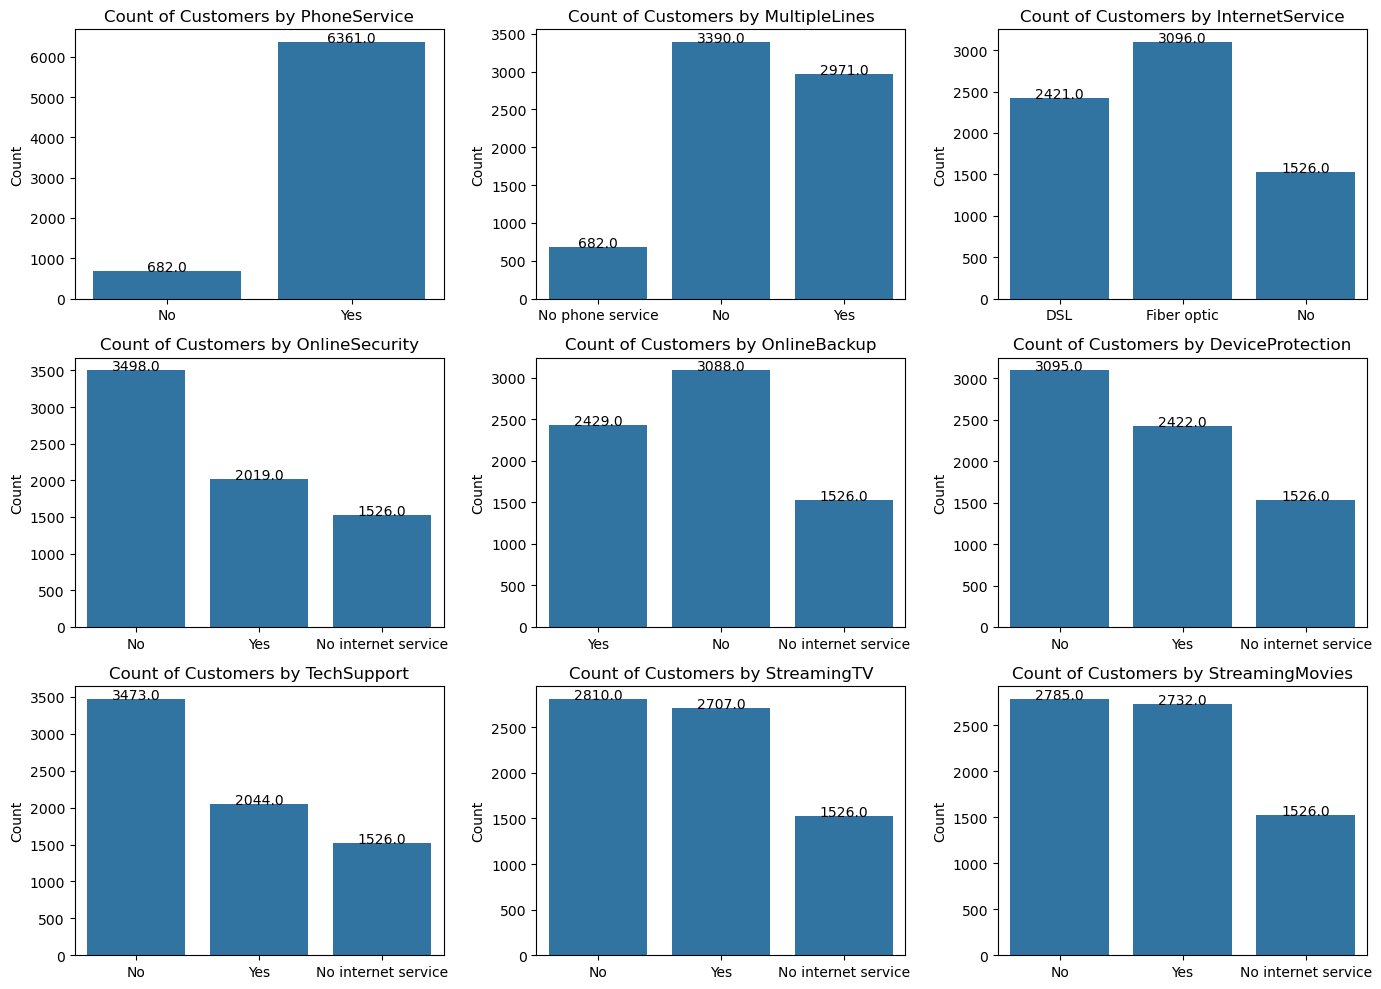

In [87]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
n_cols = 3  # Number of columns for the subplot grid
n_rows = -(-len(columns) // n_cols)  # Compute number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Generate countplots with bar labels
for i, column in enumerate(columns):
    ax = sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Count of Customers by {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    
    # Add bar labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black')
        
# Remove empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

***Highlighting the breakdown of customer Percentage by-'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'***

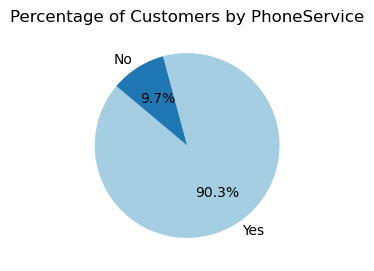

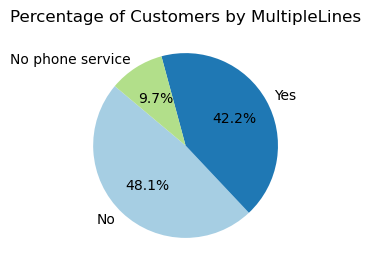

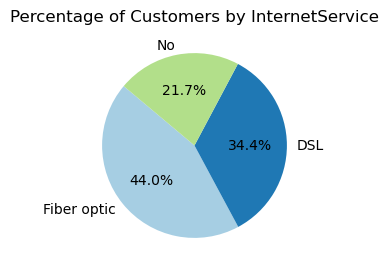

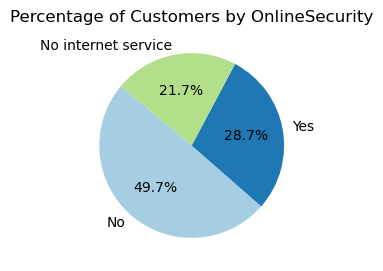

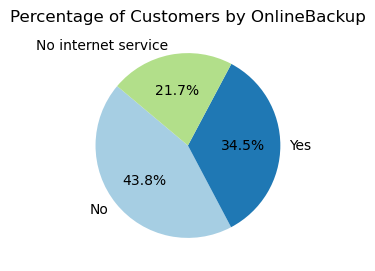

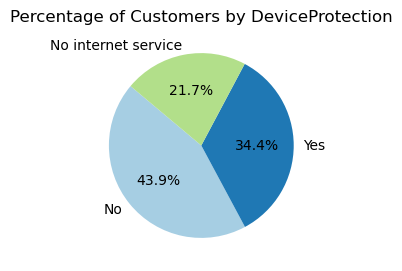

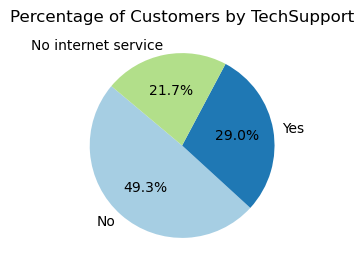

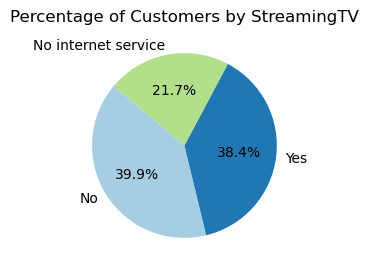

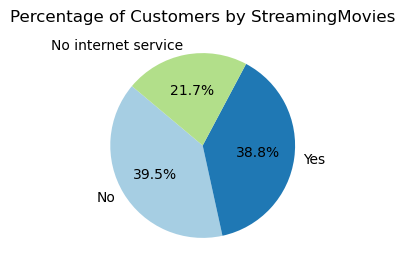

In [143]:
# List of columns to visualize
columns_to_plot = [ 'PhoneService', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Loop through each column to generate pie charts
for column in columns_to_plot:
    plt.figure(figsize=(3, 3))
    counts = df[column].value_counts()
    plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors
    )
    plt.title(f'Percentage of Customers by {column}')
    plt.show()

***Identifying Customers Churned by 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
'TechSupport', 'StreamingTV', 'StreamingMovies'***

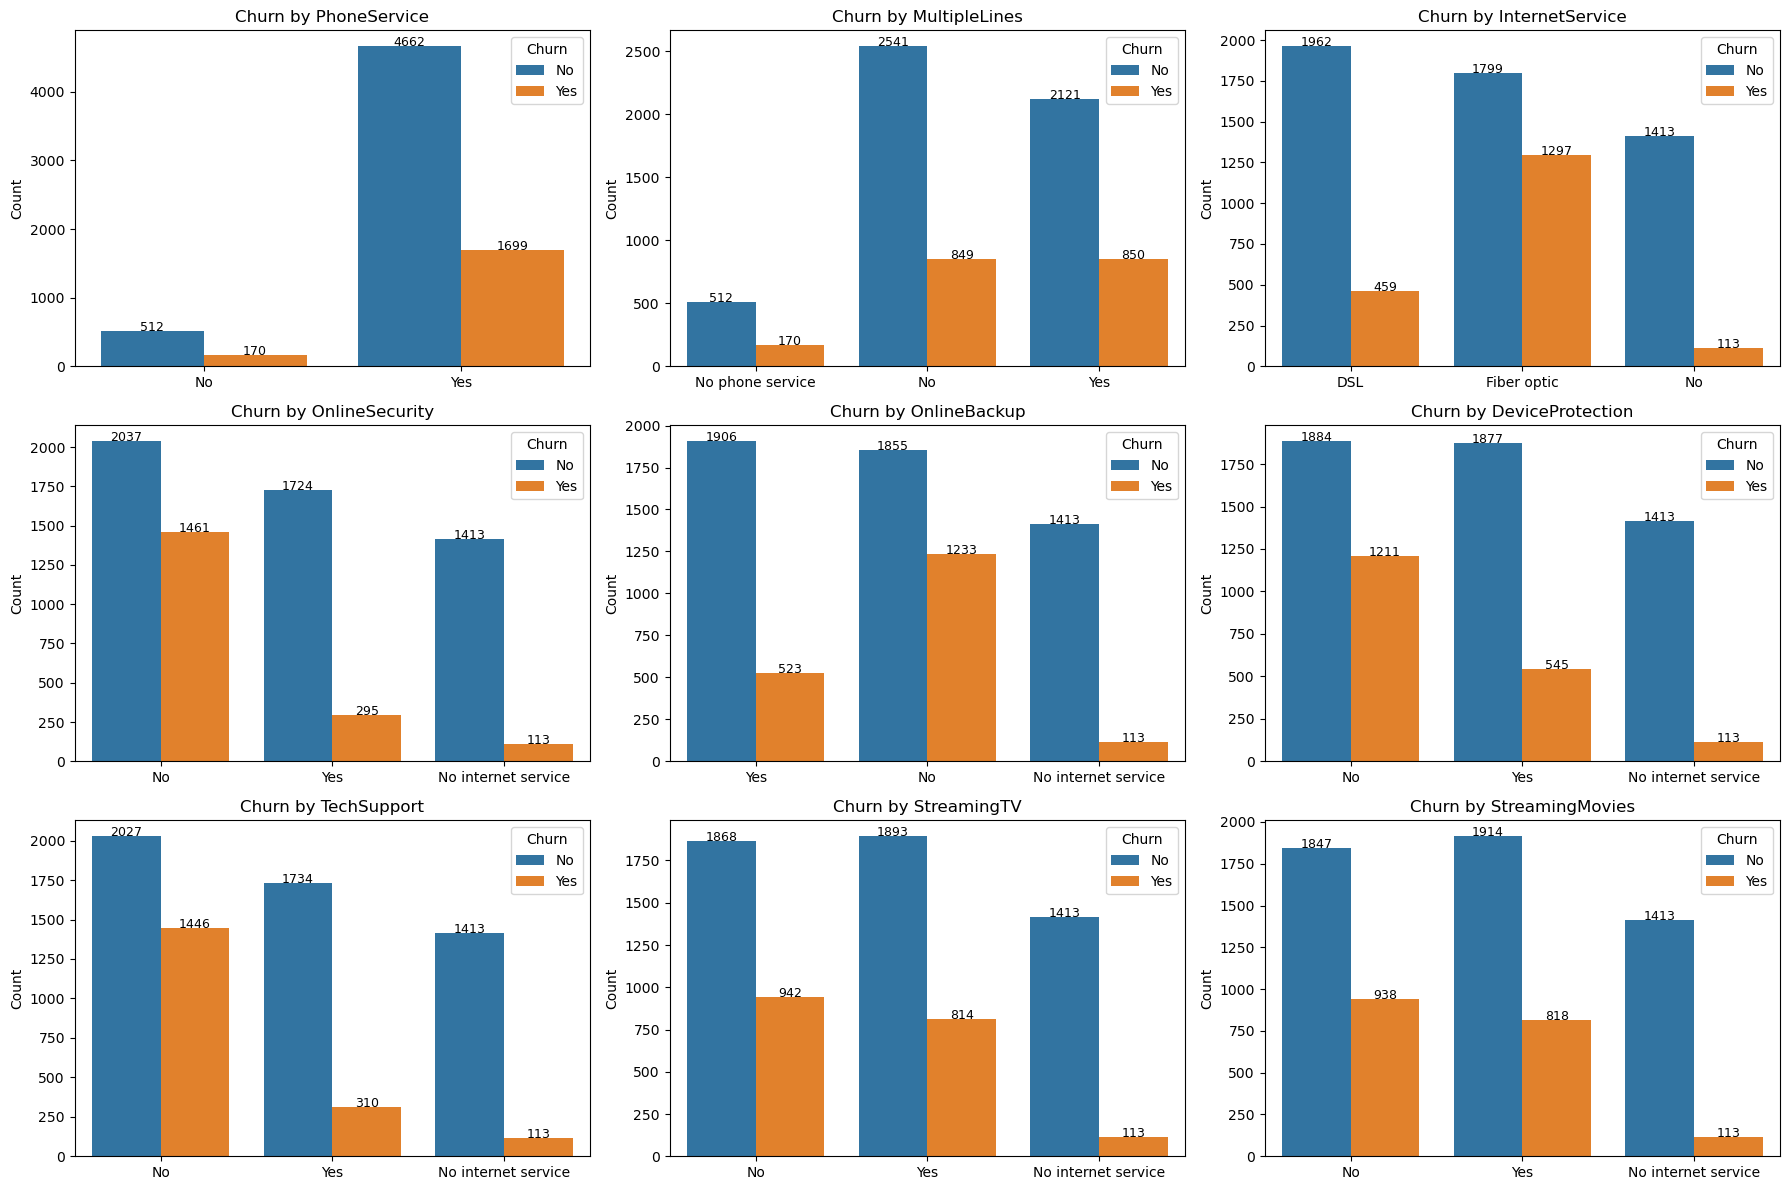

In [9]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
n_cols = 3  # Number of columns for the subplot grid
n_rows = -(-len(columns) // n_cols)  # Compute number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Generate countplots with bar labels and dynamic titles
for i, column in enumerate(columns):
    ax = sns.countplot(data=df, x=column, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    
    # Add bar labels
    for p in ax.patches:
        if p.get_height() > 0:  # Avoid labeling bars with zero height
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=9, color='black')
        
# Remove empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



The majority of customers who do not churn tend to have services like phoneservice,(perticularly DSL), and online security enabled. for service like
onlinebackup,techsupport, and streamingTV,churn retes are noticeably higher when these services are not used or are unavailable. the charts 
emphasize the relationship between service usage and customer churn.

***Presenting the Count of Customers by 'PaperlessBilling', 'PaymentMethod'***

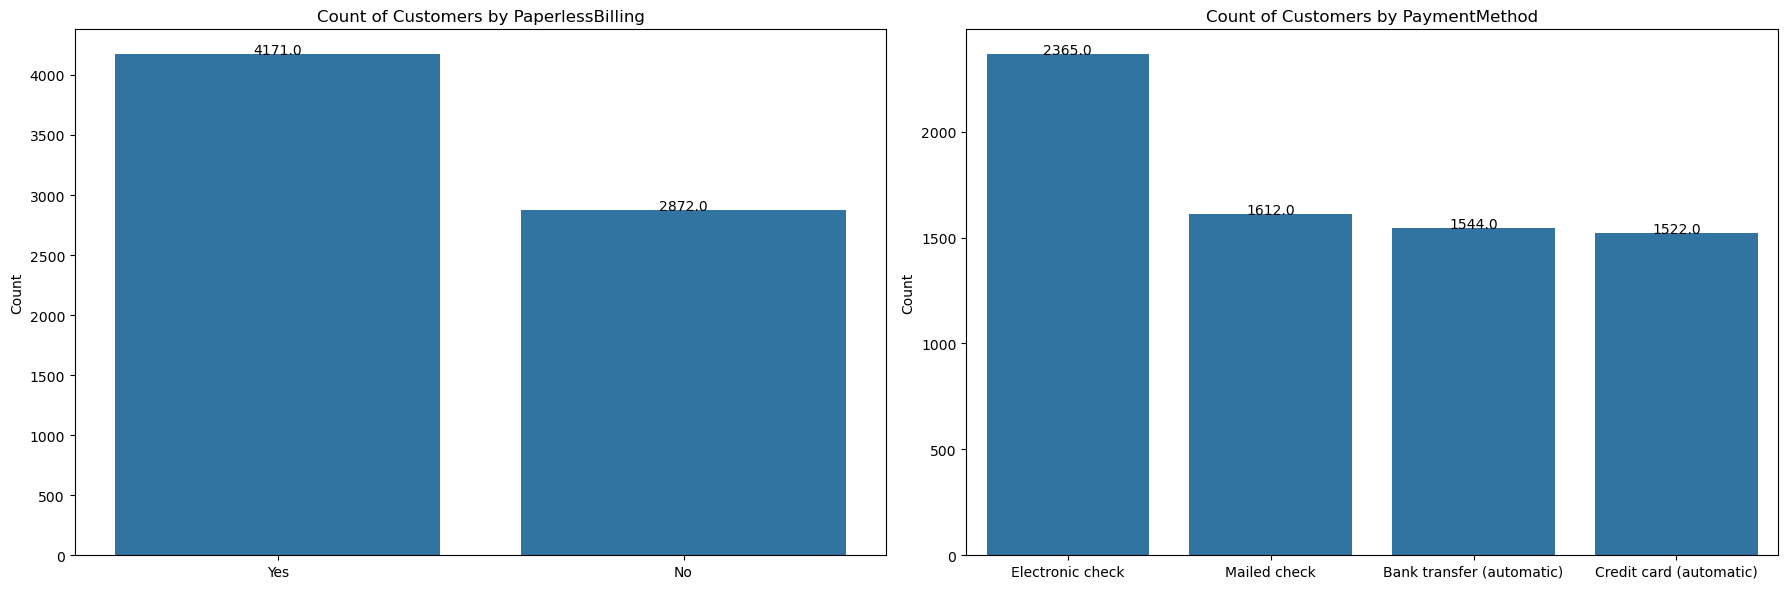

In [131]:
# List of columns to plot
col = ['PaperlessBilling','PaymentMethod']

# Create subplots
n_cols = 2  # Number of columns for the subplot grid
n_rows = -(-len(col) // n_cols)  # Compute number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Generate countplots with bar labels
for i, col in enumerate(col):
    ax = sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count of Customers by {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    
    # Add bar labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black')
        
# Remove empty subplots
for j in range(len(col), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

***Displaying the Percentage of Customers by 'PaperlessBilling', 'PaymentMethod'***

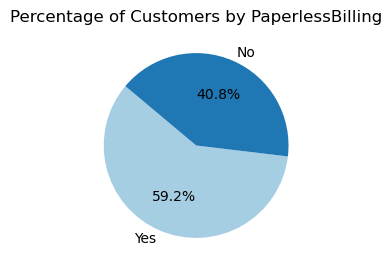

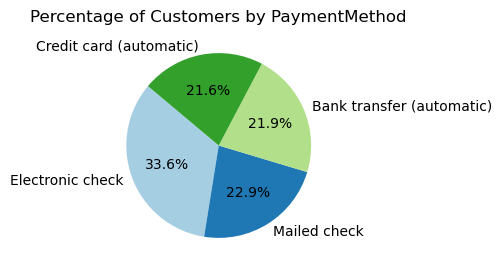

In [145]:
# List of columns to visualize
columns_to_plot = ['PaperlessBilling', 'PaymentMethod']

# Loop through each column to generate pie charts
for column in columns_to_plot:
    plt.figure(figsize=(3, 3))
    counts = df[column].value_counts()
    plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors
    )
    plt.title(f'Percentage of Customers by {column}')
    plt.show()

***Showcasing Customers Churned by 'PaperlessBilling','PaymentMethod'***

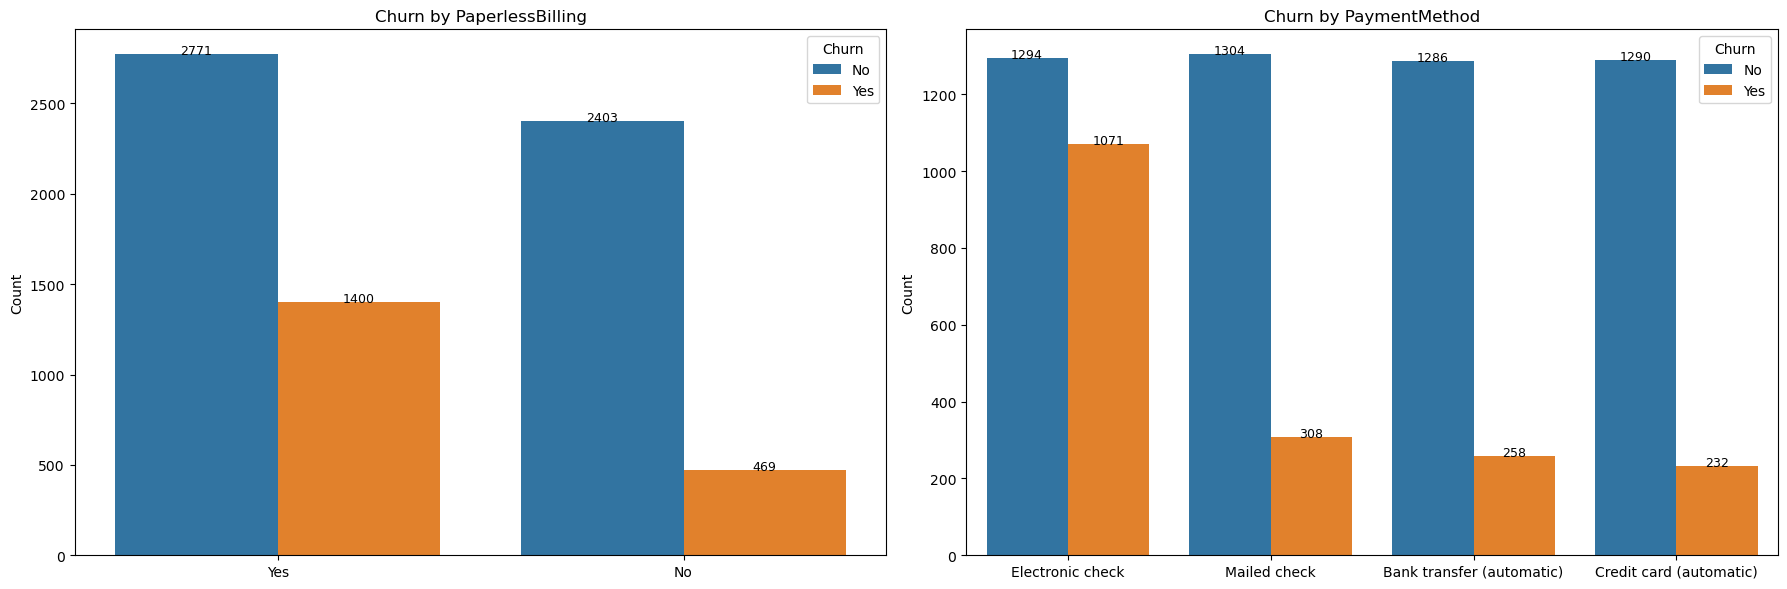

In [147]:
# List of columns to plot
clms = ['PaperlessBilling', 'PaymentMethod']

# Create subplots
n_cols = 2  # Number of columns for the subplot grid
n_rows = -(-len(clms) // n_cols)  # Compute number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Generate countplots with bar labels and dynamic titles
for i, clms in enumerate(clms):
    ax = sns.countplot(data=df, x=clms, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {clms}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    
    # Add bar labels
    for p in ax.patches:
        if p.get_height() > 0:  # Avoid labeling bars with zero height
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='baseline', fontsize=9, color='black')
        
# Remove empty subplots
for j in range(len(clms), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

The analysis of the plot reveals that customers with paperlessBilling are more Churned out.

The plot highlights that electronic check users have a higher tendency to churn compared to those using other payment methods.

1. Find the CustomerID Which is maximum Payed MonthlyCharge and which paymentmethod used by gender and is Churned out or Not ?
2. Extract the CustomerID Which is maximum Total Charge and which paymentmethod used, find gender and is Churned out or Not ?

In [150]:
# Question 1: Highest MonthlyCharge CustID
highest_monthly_charges = df[df['MonthlyCharges'] == df['MonthlyCharges'].max()]
highest_monthly_charges_result = highest_monthly_charges[['customerID','gender','PaymentMethod', 'MonthlyCharges', 'Churn']]

# Question 2: Highest TotalCharge CustID
highest_total_charges = df[df['TotalCharges'] == df['TotalCharges'].max()]
highest_total_charges_result = highest_total_charges[['customerID','gender','PaymentMethod','TotalCharges', 'Churn']]

# Display results
print("Highest MonthlyCharges Customer:")
print(highest_monthly_charges_result)

print("\nHighest TotalCharges Customer:")
print(highest_total_charges_result)

Highest MonthlyCharges Customer:
      customerID  gender              PaymentMethod  MonthlyCharges Churn
4586  7569-NMZYQ  Female  Bank transfer (automatic)          118.75    No

Highest TotalCharges Customer:
      customerID  gender     PaymentMethod TotalCharges Churn
2845  9093-FPDLG  Female  Electronic check        999.9    No
